## Particle-Based Surface Shape Modeling
## PART 1

```
conda activate shapeworks
```



In [1]:
import shapeworks as sw

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# IMPORTS

import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from pathlib import Path
from scipy.ndimage import zoom
from scipy.spatial import cKDTree
import pyvista as pv
import vtk

### 1. Load shape images

In [3]:
# PATHS

data_path="./DATA/"
shapeExtention = '.nii.gz'
shapeFilenames = sorted(glob.glob(data_path + '*' + shapeExtention)) 

print ('Number of shapes: ' + str(len(shapeFilenames)))
for shapeFilename in shapeFilenames:
    shapeFilename = Path(shapeFilename)
    print(shapeFilename)


Number of shapes: 2
DATA\F006_label_4_RF.nii.gz
DATA\F099_label_4_RF.nii.gz


In [4]:
# LOAD AND DOWNSAMPLE SEGMENTATIONS

def downsample_volume(volume, factor):
    data = volume.toArray()
    zoom_factors = (1 / factor, 1 / factor, 1 / factor)
    downsampled_data = zoom(data, zoom_factors, order=1)  # Using linear interpolation
    return sw.Image(downsampled_data.astype(np.float32))

# Adjust the downsample factor based on your hardware capabilities
downsample_factor = 2

# List of shape segmentations
small_shapes = []

# List of shape names (shape files prefixes) to be used for saving outputs and visualizations
small_shapeNames = [] 

# Loop over all shape files and load individual segmentations
for shapeFilename in shapeFilenames:
    print('Loading: ' + str(shapeFilename))
    
    # Convert to Path object to access .name attribute
    shapeFilename = Path(shapeFilename)
    
    # Current shape name
    segFilename = shapeFilename.name
    shapeName = segFilename[:-len(shapeExtention)]
    small_shapeNames.append(shapeName)
    
    # Load segmentation
    shapeSeg = sw.Image(str(shapeFilename))
    
    # Downsample the volume if needed
    downsampled_shapeSeg = downsample_volume(shapeSeg, downsample_factor)
    
    # Append to the shape list
    small_shapes.append(downsampled_shapeSeg)

num_samples = len(small_shapes)
print('\n' + str(num_samples) + ' segmentations are loaded for the dataset...')


Loading: ./DATA\F006_label_4_RF.nii.gz
Loading: ./DATA\F099_label_4_RF.nii.gz

2 segmentations are loaded for the dataset...


### 2. Visualize Images

In [5]:
#VISUALIZATION PARAMETERS

use_same_window = False # plot using multiple rendering windows if false
notebook        = False # True will enable the plots to lie inline
show_borders    = True  # show borders for each rendering window
shade_volumes   = True  # use shading when performing volume rendering
color_map       = "viridis" # color map for volume rendering, e.g., 'bone', 'coolwarm', 'cool', 'viridis', 'magma'
show_axes       = True  # show a vtk axes widget for each rendering window
show_bounds     = True  # show volume bounding box
show_all_edges  = True  # add an unlabeled and unticked box at the boundaries of plot. 
font_size       = 10    # text font size for windows
link_views      = True  # link all rendering windows so that they share same camera and axes boundaries


# EXAMPLE USAGE

""" 
sw.plot_volumes(small_shapes,    
             volumeNames     = small_shapeNames, 
             use_same_window = use_same_window,
             notebook        = notebook,
             show_borders    = show_borders,  
             shade_volumes   = shade_volumes, 
             color_map       = color_map,
             show_axes       = show_axes,  
             show_bounds     = show_bounds,
             show_all_edges  = show_all_edges, 
             font_size       = font_size,   
             link_views      = link_views
             ) 
"""

print()

### 3. Convert images

In [6]:
# Threshold and binarize the segmentation images
for idx in range(len(small_shapes)):
    shapeSeg = small_shapes[idx]
    # Convert to numpy array to inspect voxel values
    shapeSeg_array = shapeSeg.toArray()
    # Get unique voxel values
    voxelValues = np.unique(shapeSeg_array)
    print(f"Shape {idx} voxel values before binarization: {voxelValues}")
    
    # Determine threshold values
    minVal = voxelValues.min()
    maxVal = voxelValues.max()
    threshold = (minVal + maxVal) / 2.0  # Midpoint threshold

    # Binarize the image: set voxels >= threshold to 1.0, else 0.0
    shapeSeg.binarize(minVal=threshold, maxVal=maxVal, innerVal=1.0, outerVal=0.0)
    
    # Verify binarization
    binarized_voxelValues = np.unique(shapeSeg.toArray())
    print(f"Shape {idx} voxel values after binarization: {binarized_voxelValues}")
    
    # Update the image in the list
    small_shapes[idx] = shapeSeg


Shape 0 voxel values before binarization: [0.         0.09131903 0.09252457 ... 0.89141685 0.8925598  1.        ]
Shape 0 voxel values after binarization: [0. 1.]
Shape 1 voxel values before binarization: [0.000000e+00 5.842163e-04 1.215121e-03 ... 9.815617e-01 9.956332e-01
 1.000000e+00]
Shape 1 voxel values after binarization: [0. 1.]


In [7]:
# CONVERT TO VTK IMAGE
shapeSeg1 = small_shapes[0]
shapeSeg2 = small_shapes[1]
shapeSeg1_vtk = sw.sw2vtkImage(shapeSeg1, verbose = True)
shapeSeg2_vtk = sw.sw2vtkImage(shapeSeg2, verbose = True)
# sw.plot_volumes(shapeSeg1_vtk)
# sw.plot_volumes(shapeSeg2_vtk)

shapeworks image header information: 
{
	dims: [233, 226, 759],
	origin: [0, 0, 0],
	size: [233, 226, 759],
	spacing: [1, 1, 1]
}

vtk image header information: 
ImageData (0x19d38816460)
  N Cells:      39567600
  N Points:     39967422
  X Bounds:     0.000e+00, 2.320e+02
  Y Bounds:     0.000e+00, 2.250e+02
  Z Bounds:     0.000e+00, 7.580e+02
  Dimensions:   233, 226, 759
  Spacing:      1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:     1
shapeworks image header information: 
{
	dims: [230, 223, 772],
	origin: [0, 0, 0],
	size: [230, 223, 772],
	spacing: [1, 1, 1]
}

vtk image header information: 
ImageData (0x19d388164c0)
  N Cells:      39196098
  N Points:     39595880
  X Bounds:     0.000e+00, 2.290e+02
  Y Bounds:     0.000e+00, 2.220e+02
  Z Bounds:     0.000e+00, 7.710e+02
  Dimensions:   230, 223, 772
  Spacing:      1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:     1


In [8]:
# CONVERT TO MESH

def convert_plot_save(shapeSeg, output_filename):
    print(f'\nCreating mesh: {output_filename}')
    # Convert shapeSeg to numpy array
    shapeSeg_array = shapeSeg.toArray()
    # Get unique voxel values
    voxelValues = np.unique(shapeSeg_array)
    # Suppress scientific notation
    np.set_printoptions(suppress=True)
    print('Voxel values:' + str(voxelValues))
    # Display warning
    if len(voxelValues) > 2:
        print('WARNING: Voxels have more than two distinct values')
        print('PLEASE make sure to use binary segmentations')
    else:
        print('Shape is a binary segmentation')
    # Get min and max values
    minVal = shapeSeg_array.min()
    maxVal = shapeSeg_array.max()
    # Compute isovalue
    isoValue = (maxVal - minVal) / 2.0
    print('isoValue = ' + str(isoValue))
    # Extract isosurface
    shapeMesh = shapeSeg.toMesh(isovalue=isoValue)
    # Convert to VTK format
    shapeMesh_vtk = sw.sw2vtkMesh(shapeMesh)
    # Plot
    sw.plot_meshes([shapeMesh_vtk])
    # Convert VTK mesh to PyVista object
    pv_mesh = pv.wrap(shapeMesh_vtk)
    # Save the VTK mesh
    pv_mesh.save(output_filename)
    print(f'Saved VTK mesh to: {output_filename}')
    
def exportMesh(vtk_mesh, output_filename):
    pv_mesh = pv.wrap(vtk_mesh)
    pv_mesh.save(output_filename)
    print(f'Saved VTK mesh to: {output_filename}')
    
def seg2mesh(shapeSeg):
    print(f'\nCreating mesh...')
    # Convert shapeSeg to numpy array
    shapeSeg_array = shapeSeg.toArray()
    # Get unique voxel values
    voxelValues = np.unique(shapeSeg_array)
    # Suppress scientific notation
    np.set_printoptions(suppress=True)
    print('Voxel values:' + str(voxelValues))
    # Display warning
    if len(voxelValues) > 2:
        print('WARNING: Voxels have more than two distinct values')
    # Get min and max values
    minVal = shapeSeg_array.min()
    maxVal = shapeSeg_array.max()
    # Compute isovalue
    isoValue = (maxVal - minVal) / 2.0
    # Extract isosurface
    shapeMesh = shapeSeg.toMesh(isovalue=isoValue)
    # Convert to VTK format
    shapeMesh_vtk = sw.sw2vtkMesh(shapeMesh, verbose = False)
    return shapeMesh_vtk

# Example usage
# convert_plot_save(shapeSeg1, 'shape1.vtk')
# convert_plot_save(shapeSeg2, 'shape2.vtk')

output_dir = 'OUTPUT'
os.makedirs(output_dir, exist_ok=True)

exportMesh(shapeSeg1_vtk, output_dir + '/shape1.vtk')
exportMesh(shapeSeg2_vtk, output_dir + '/shape2.vtk')

Saved VTK mesh to: OUTPUT/shape1.vtk
Saved VTK mesh to: OUTPUT/shape2.vtk


### 4. Align shapes (Meshes)

To inspect how mutliple segmentation are spatially aligned with respect to each other, we will visualize their surfaces in the same rendering window. 

In [9]:
# PLOT MESHES

shape_iso_surfaces = [seg2mesh(shapeSeg1), seg2mesh(shapeSeg2)]

sw.plot_meshes(shape_iso_surfaces,       
            use_same_window = True, 
            notebook        = False,  
            show_borders    = True,  
            meshes_color    = ['blue','red'], 
            mesh_style      = "surface", 
            show_mesh_edges = False, 
            show_axes       = True,  
            show_bounds     = True,  
            show_all_edges  = True,  
            font_size       = 10,    
            link_views      = True   
           )


Creating mesh...
Voxel values:[0. 1.]

Creating mesh...
Voxel values:[0. 1.]


In [10]:
# CENTER AND SCALE MESHES

for mesh in shape_iso_surfaces:
    # Get the points of the mesh
    points = mesh.points
    print(len(points))
    # Compute the centroid of the mesh
    centroid = np.mean(points, axis=0)
    # Center the mesh at the origin
    points -=  centroid
    # Compute the scale factor (maximum distance from origin)
    distances = np.linalg.norm(points, axis=1)
    scale_factor = np.max(distances)
    # Scale the mesh to unit size
    points /= scale_factor
    mesh.points = points

sw.plot_meshes(
    shape_iso_surfaces,
    use_same_window=True,
    notebook=False,
    show_borders=True,
    meshes_color=['blue', 'red'],
    mesh_style="surface",
    show_mesh_edges=False,
    show_axes=True,
    show_bounds=True,
    show_all_edges=True,
    font_size=10,
    link_views=True
)

56994
45538


In [11]:
def vtk_mesh_to_pyvista(mesh):
    print("Converting VTK mesh to PyVista mesh...")
    # Ensure mesh is a vtkPolyData
    if not isinstance(mesh, vtk.vtkPolyData):
        raise TypeError("Input mesh must be a vtkPolyData")
    # Convert to PyVista mesh
    pv_mesh = pv.wrap(mesh)
    return pv_mesh

pv_meshes = []
for sw_mesh in shape_iso_surfaces:
    # Convert VTK mesh to PyVista mesh
    pv_mesh = vtk_mesh_to_pyvista(sw_mesh)
    pv_meshes.append(pv_mesh)

def sample_random_points_on_mesh(mesh, n_points):
    print(f"Sampling {n_points} random points on the mesh...")
    # Triangulate the mesh to ensure all faces are triangles
    mesh = mesh.triangulate()
    # Compute the area of each triangle
    mesh_with_areas = mesh.compute_cell_sizes(length=False, area=True, volume=False)
    areas = mesh_with_areas['Area']
    total_area = np.sum(areas)
    # Normalize areas to get probabilities
    probabilities = areas / total_area
    # Cumulative distribution
    cumulative_areas = np.cumsum(probabilities)
    # Sample triangle indices according to their area
    random_values = np.random.rand(n_points)
    triangle_indices = np.searchsorted(cumulative_areas, random_values)
    # Sample points within the selected triangles
    points = []
    for triangle_idx in triangle_indices:
        # Get the indices of the triangle's vertices
        cell = mesh.faces[triangle_idx * 4:(triangle_idx + 1) * 4]
        indices = cell[1:4]
        triangle = mesh.points[indices]
        # Generate random barycentric coordinates
        r1 = np.random.rand()
        r2 = np.random.rand()
        sqrt_r1 = np.sqrt(r1)
        barycentric_coords = [1 - sqrt_r1, sqrt_r1 * (1 - r2), sqrt_r1 * r2]
        point = (barycentric_coords[0] * triangle[0] +
                 barycentric_coords[1] * triangle[1] +
                 barycentric_coords[2] * triangle[2])
        points.append(point)
    return np.array(points)

def particle_based_optimization(mesh, n_points=1000, iterations=20, step_size=0.01):
    print(f"Starting particle-based optimization with {n_points} points and {iterations} iterations...")
    # Initialize particles by sampling random points on the mesh
    particles = sample_random_points_on_mesh(mesh, n_points)
    # KDTree for efficient nearest neighbor search
    tree = cKDTree(mesh.points)
    for i in range(iterations):
        if i % 10 == 0:
            print(f"    Iteration {i}/{iterations}...")
        # Compute pairwise distances among particles
        particle_tree = cKDTree(particles)
        pairs = particle_tree.query_pairs(r=0.05)
        # Initialize forces
        forces = np.zeros_like(particles)
        for idx1, idx2 in pairs:
            # Compute vector between particles
            vec = particles[idx1] - particles[idx2]
            dist = np.linalg.norm(vec)
            if dist > 1e-5:
                # Repulsive force
                force = vec / dist**2
                forces[idx1] += force
                forces[idx2] -= force
        # Update particle positions
        particles += step_size * forces
        # Project back onto the mesh surface
        distances, idx = tree.query(particles)
        particles = mesh.points[idx]
    print("Optimization complete.")
    return particles

# List to store optimized particle positions for each mesh
optimized_points_list = []

for mesh in pv_meshes:
    optimized_points = particle_based_optimization(mesh)
    optimized_points_list.append(optimized_points)

# Plot the optimized points on both meshes side by side
p = pv.Plotter(shape=(1, 2), notebook=False)

# Plot first mesh and its points
p.subplot(0, 0)
p.add_mesh(pv_meshes[0], color='lightgray', opacity=0.5, show_edges=False)
p.add_points(optimized_points_list[0], color='blue', point_size=5)

# Plot second mesh and its points
p.subplot(0, 1)
p.add_mesh(pv_meshes[1], color='lightgray', opacity=0.5, show_edges=False)
p.add_points(optimized_points_list[1], color='red', point_size=5)

p.show(title='Particle-Based Optimization on Meshes')

# Save the optimized points
np.save('optimized_points_mesh1.npy', optimized_points_list[0])
np.save('optimized_points_mesh2.npy', optimized_points_list[1])

print("Point distributions have been saved.")


Converting VTK mesh to PyVista mesh...
Converting VTK mesh to PyVista mesh...
Starting particle-based optimization with 1000 points and 20 iterations...
Sampling 1000 random points on the mesh...
    Iteration 0/20...
    Iteration 10/20...
Optimization complete.
Starting particle-based optimization with 1000 points and 20 iterations...
Sampling 1000 random points on the mesh...
    Iteration 0/20...
    Iteration 10/20...
Optimization complete.
Point distributions have been saved.


: 

In [ ]:
# Function to convert VTK mesh to PyVista mesh
def vtk_mesh_to_pyvista(mesh):
    print("Converting VTK mesh to PyVista mesh...")
    if not isinstance(mesh, vtk.vtkPolyData):
        raise TypeError("Input mesh must be a vtk.vtkPolyData")
    pv_mesh = pv.wrap(mesh)
    return pv_mesh

# Assuming you have your VTK meshes loaded in 'shape_iso_surfaces'
pv_meshes = []
optimized_points_list = []

# Create a directory for saving the meshes as VTK files
mesh_output_dir = "mesh_files/"
os.makedirs(mesh_output_dir, exist_ok=True)

# Convert VTK meshes to PyVista meshes and save them as VTK files
mesh_file_paths = []
for i, sw_mesh in enumerate(shape_iso_surfaces):
    pv_mesh = vtk_mesh_to_pyvista(sw_mesh)
    pv_meshes.append(pv_mesh)
    
    # Save the PyVista mesh as a VTK file
    mesh_file_path = os.path.join(mesh_output_dir, f'mesh_{i+1}.vtk')
    pv_mesh.save(mesh_file_path)
    mesh_file_paths.append(mesh_file_path)

# Function to perform particle-based optimization across all meshes
def particle_based_optimization_for_all_meshes(mesh_files, number_of_particles=1024):
    """
    Perform particle-based optimization to distribute points on meshes.
    Args:
        mesh_files: List of paths to mesh files (in .vtk or other supported formats).
        number_of_particles: Number of particles (points) to distribute on each mesh.
    Returns:
        optimized_points_all_meshes: List of optimized points arrays for each mesh.
    """
    # Initialize ShapeWorks ParticleSystem with the list of mesh files
    particle_system = sw.ParticleSystem(mesh_files)

    # Set optimization parameters
    optimization_params = sw.OptimizationParameters()
    optimization_params.number_of_particles = number_of_particles
    optimization_params.use_normals = 1
    optimization_params.normal_weight = 10.0
    optimization_params.attributes_per_domain = 0
    optimization_params.procrustes_interval = 5
    optimization_params.procrustes_scaling = 1
    optimization_params.optimization_iterations = 1000
    optimization_params.initial_relative_weighting = 0.05
    optimization_params.relative_weighting = 0.5
    optimization_params.starting_regularization = 1000
    optimization_params.ending_regularization = 1.0
    optimization_params.recompute_regularization_interval = 1
    optimization_params.save_init_splits = 0
    optimization_params.domain_type = 0  # 0 for surface, 1 for image

    # Run the optimization
    particle_system.optimize(optimization_params)

    # Retrieve optimized points for each mesh
    optimized_points_all_meshes = []
    for domain in particle_system.get_domains():
        points = domain.get_local_points()
        optimized_points_all_meshes.append(points)

    return optimized_points_all_meshes

# Perform particle optimization across all meshes, ensuring consistency
optimized_points_all_meshes = particle_based_optimization_for_all_meshes(
    mesh_file_paths,
    number_of_particles=512  # Adjust based on your needs
)

# Plot the optimized points on all meshes side by side with consistent labels
p = pv.Plotter(shape=(1, len(pv_meshes)), window_size=(1024, 512))
for i, (mesh, points) in enumerate(zip(pv_meshes, optimized_points_all_meshes)):
    p.subplot(0, i)
    p.add_mesh(mesh, color='lightgray', opacity=0.5)
    p.add_points(points, render_points_as_spheres=True, point_size=5, color='red')
    # Label each point with its index
    for idx, point in enumerate(points):
        p.add_point_labels(point.reshape(1, -1), [str(idx+1)], point_size=5, font_size=10, text_color='blue')

p.link_views()  # Link the camera views
p.show()

# Save the optimized points for each mesh
output_dir = 'output_points/'  # Ensure this directory exists
os.makedirs(output_dir, exist_ok=True)
for i, optimized_points in enumerate(optimized_points_all_meshes):
    np.save(output_dir + f'optimized_points_mesh_{i+1}.npy', optimized_points)

print("Point distributions for all meshes have been saved.")


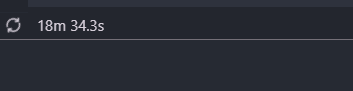